# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [2]:
# Initialize the random number generator
import random
random.seed(0)

import tensorflow as tf

import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
from keras.backend import backend
from keras.datasets import mnist


# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


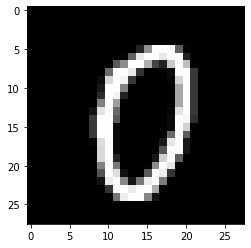

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [5]:
# print("Label: {}".format(y_train[1000]))
ds024_train = [X_train[key] for (key, label) in enumerate(y_train) if int(label) >= 0 and int(label) <= 4]
ds529_train = [X_train[key] for (key, label) in enumerate(y_train) if int(label) >= 5 and int(label) <= 9]

ds024_test = [X_test[key] for (key, label) in enumerate(y_test) if int(label) >= 0 and int(label) <= 4]
ds529_test = [X_test[key] for (key, label) in enumerate(y_test) if int(label) >= 5 and int(label) <= 9]



## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [6]:
ds024_train = np.asarray(ds024_train)
print("Shape Zero to Four Train Dataset",ds024_train.shape)
ds529_train = np.asarray(ds529_train)
print("Shape Five to Nine Train Dataset",ds529_train.shape)

ds024_test = np.asarray(ds024_test)
print("Shape Zero to Four Test Dataset",ds024_test.shape)
ds529_test = np.asarray(ds529_test)
print("Shape Five to Nine Test Dataset",ds529_test.shape)




Shape Zero to Four Train Dataset (30596, 28, 28)
Shape Five to Nine Train Dataset (29404, 28, 28)
Shape Zero to Four Test Dataset (5139, 28, 28)
Shape Five to Nine Test Dataset (4861, 28, 28)


In [7]:
y_train024 = np.asarray([y_train[key] for (key, label) in enumerate(y_train) if int(label) >= 0 and int(label) <= 4])
y_train529 = np.asarray([y_train[key] for (key, label) in enumerate(y_train) if int(label) >= 5 and int(label) <= 9])

y_test024 = np.asarray([y_test[key] for (key, label) in enumerate(y_test) if int(label) >= 0 and int(label) <= 4])
y_test529 = np.asarray([y_test[key] for (key, label) in enumerate(y_test) if int(label) >= 5 and int(label) <= 9])

## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [8]:
ds024_train = ds024_train.reshape(ds024_train.shape[0], 28, 28, 1)


In [9]:
ds024_test = ds024_test.reshape(ds024_test.shape[0], 28, 28, 1)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [11]:
ds024_train = ds024_train/255

In [12]:
ds024_test = ds024_test / 255

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [13]:
print("Shape of Zero to Four Train Dataset shape", ds024_train.shape)
print("Shape of Five to Nine Test Dataset shape", ds024_test.shape)

Shape of Zero to Four Train Dataset shape (30596, 28, 28, 1)
Shape of Five to Nine Test Dataset shape (5139, 28, 28, 1)


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [15]:
yTrain = tf.keras.utils.to_categorical(y_train024, num_classes=5)
yTest = tf.keras.utils.to_categorical(y_test024, num_classes=5)


## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [18]:
# # Creating a Sequential Model and adding the layers
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


W0915 18:09:47.773505 10560 deprecation_wrapper.py:119] From C:\Users\obuli\.conda\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0915 18:09:48.329710 10560 deprecation_wrapper.py:119] From C:\Users\obuli\.conda\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0915 18:09:48.449093 10560 deprecation_wrapper.py:119] From C:\Users\obuli\.conda\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0915 18:09:48.759159 10560 deprecation_wrapper.py:119] From C:\Users\obuli\.conda\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0915 18:09:48.765484 10560 deprecation_wrapper.py:

## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [19]:
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(5,activation=tf.nn.softmax))

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [34]:
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=ds024_train,y=yTrain, epochs=10, validation_data=(ds024_test,yTest),batch_size=128)

Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 4s 137us/step - loss: 0.1072 - acc: 0.9659 - val_loss: 0.0370 - val_acc: 0.9883
Epoch 2/10
30596/30596 [==============================] - 4s 121us/step - loss: 0.0466 - acc: 0.9862 - val_loss: 0.0258 - val_acc: 0.9920
Epoch 3/10
30596/30596 [==============================] - 4s 123us/step - loss: 0.0368 - acc: 0.9883 - val_loss: 0.0218 - val_acc: 0.9928
Epoch 4/10
30596/30596 [==============================] - 4s 135us/step - loss: 0.0336 - acc: 0.9898 - val_loss: 0.0225 - val_acc: 0.9926
Epoch 5/10
30596/30596 [==============================] - 4s 132us/step - loss: 0.0308 - acc: 0.9908 - val_loss: 0.0181 - val_acc: 0.9946
Epoch 6/10
30596/30596 [==============================] - 4s 137us/step - loss: 0.0292 - acc: 0.9911 - val_loss: 0.0189 - val_acc: 0.9932
Epoch 7/10
30596/30596 [==============================] - 4s 129us/step - loss: 0.0274 - acc: 0.9918 - val_loss: 0.0177 - v

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [21]:
# model.evaluate(x_test, y_test)
model.evaluate(x=ds024_test,y=yTest)

5139/5139 [==============================] - 1s 191us/step


[0.016515783882676528, 0.9945514691574237]

## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [22]:
#Set pre-trained model layers to not trainable
for layer in model.layers[:-2]:
    layer.trainable = False

In [24]:
# Print trainable status of layesrs
for layer in model.layers:
    print(layer, layer.trainable)

<keras.layers.convolutional.Conv2D object at 0x000001FAFF4C3EF0> False
<keras.layers.convolutional.Conv2D object at 0x000001FAF4AF4208> False
<keras.layers.pooling.MaxPooling2D object at 0x000001FAFF511198> False
<keras.layers.core.Dropout object at 0x000001FAFF5111D0> False
<keras.layers.core.Flatten object at 0x000001FAFF4C96D8> False
<keras.layers.core.Dense object at 0x000001FA83CD8FD0> True
<keras.layers.core.Dense object at 0x000001FA83CD8668> True


### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [27]:
y_train529 = y_train529 - 5
y_test529 = y_test529 - 5


### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [28]:
ds529_train = ds529_train.reshape(ds529_train.shape[0], 28, 28, 1)
ds529_test = ds529_test.reshape(ds529_test.shape[0], 28, 28, 1)

### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [30]:
ds529_train = ds529_train.astype("float32")
ds529_test = ds529_test.astype("float32")

In [31]:
ds529_train = ds529_train / 255
ds529_test = ds529_test / 255


### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
yTrain529 = tf.keras.utils.to_categorical(y_train529, num_classes=5)
yTest529 = tf.keras.utils.to_categorical(y_test529, num_classes=5)

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [32]:
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=ds529_train,y=yTrain529, epochs=10,validation_data=(ds529_test,yTest529), batch_size=128)

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 4s 145us/step - loss: 0.3567 - acc: 0.8914 - val_loss: 0.1665 - val_acc: 0.9449
Epoch 2/10
29404/29404 [==============================] - 4s 123us/step - loss: 0.1648 - acc: 0.9485 - val_loss: 0.1287 - val_acc: 0.9564
Epoch 3/10
29404/29404 [==============================] - 4s 121us/step - loss: 0.1338 - acc: 0.9582 - val_loss: 0.1066 - val_acc: 0.9659
Epoch 4/10
29404/29404 [==============================] - 4s 124us/step - loss: 0.1145 - acc: 0.9647 - val_loss: 0.0936 - val_acc: 0.9700
Epoch 5/10
29404/29404 [==============================] - 4s 128us/step - loss: 0.1037 - acc: 0.9672 - val_loss: 0.0846 - val_acc: 0.9733
Epoch 6/10
29404/29404 [==============================] - 4s 122us/step - loss: 0.0960 - acc: 0.9698 - val_loss: 0.0801 - val_acc: 0.9737
Epoch 7/10
29404/29404 [==============================] - 4s 123us/step - loss: 0.0895 - acc: 0.9726 - val_loss: 0.0755 - v

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [33]:
# model.evaluate(x_test, y_test)
model.evaluate(x=ds529_test,y=yTest529)

4861/4861 [==============================] - 1s 167us/step


[0.06716753529816578, 0.9759308783097219]

-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [102]:
import pandas as pd
import numpy as np
import scipy as sp
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [8]:
tweets = pd.read_csv("tweets.csv",encoding = 'unicode_escape')
tweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### Drop null values
- drop all the rows with null values

In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
tweet_text                                            9092 non-null object
emotion_in_tweet_is_directed_at                       3291 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    9093 non-null object
dtypes: object(3)
memory usage: 213.2+ KB


In [18]:
tweets_01 = tweets.dropna(axis=0)
tweets_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3291 entries, 0 to 9088
Data columns (total 3 columns):
tweet_text                                            3291 non-null object
emotion_in_tweet_is_directed_at                       3291 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    3291 non-null object
dtypes: object(3)
memory usage: 102.8+ KB


### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [19]:
tweets_01.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [50]:
# convert all text to lowercase - use .lower()
tweets_01 =  tweets_01.astype(str).apply(lambda x: x.str.lower())
tweets_01.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iphone,negative emotion
1,@jessedee know about @fludapp ? awesome ipad/i...,ipad or iphone app,positive emotion
2,@swonderlin can not wait for #ipad 2 also. the...,ipad,positive emotion
3,@sxsw i hope this year's festival isn't as cra...,ipad or iphone app,negative emotion
4,@sxtxstate great stuff on fri #sxsw: marissa m...,google,positive emotion


In [62]:
# select only numbers, alphabets, and #+_ from text - use re.sub()
pattern = r'[^a-zA-z0-9#+_\s]'
tweets_02 = tweets_01.applymap(lambda x: re.sub(pattern,'',str(x)))
tweets_02.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


In [63]:
tweets_02 = tweets_01.applymap(lambda x: str(x).strip())
tweets_02.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iphone,negative emotion
1,@jessedee know about @fludapp ? awesome ipad/i...,ipad or iphone app,positive emotion
2,@swonderlin can not wait for #ipad 2 also. the...,ipad,positive emotion
3,@sxsw i hope this year's festival isn't as cra...,ipad or iphone app,negative emotion
4,@sxtxstate great stuff on fri #sxsw: marissa m...,google,positive emotion


print dataframe

In [64]:
tweets_02.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iphone,negative emotion
1,@jessedee know about @fludapp ? awesome ipad/i...,ipad or iphone app,positive emotion
2,@swonderlin can not wait for #ipad 2 also. the...,ipad,positive emotion
3,@sxsw i hope this year's festival isn't as cra...,ipad or iphone app,negative emotion
4,@sxtxstate great stuff on fri #sxsw: marissa m...,google,positive emotion


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [87]:
tweets_updated = tweets_02[((tweets_02["is_there_an_emotion_directed_at_a_brand_or_product"] == 'positive emotion') |(tweets_02["is_there_an_emotion_directed_at_a_brand_or_product"] == 'negative emotion'))]

In [88]:
tweets_updated.head()
# tweets_updated["is_there_an_emotion_directed_at_a_brand_or_product"].unique()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iphone,negative emotion
1,@jessedee know about @fludapp ? awesome ipad/i...,ipad or iphone app,positive emotion
2,@swonderlin can not wait for #ipad 2 also. the...,ipad,positive emotion
3,@sxsw i hope this year's festival isn't as cra...,ipad or iphone app,negative emotion
4,@sxtxstate great stuff on fri #sxsw: marissa m...,google,positive emotion


## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [82]:
# tweets_updated["is_there_an_emotion_directed_at_a_brand_or_product"] = tweets_updated["is_there_an_emotion_directed_at_a_brand_or_product"].replace("positive emotion",1)
# tweets_updated["is_there_an_emotion_directed_at_a_brand_or_product"] = tweets_updated["is_there_an_emotion_directed_at_a_brand_or_product"].replace("negative emotion",0).head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:
tweets_updated["is_there_an_emotion_directed_at_a_brand_or_product"] = tweets_updated["is_there_an_emotion_directed_at_a_brand_or_product"].map({"positive emotion": 1,"negative emotion": 0 })

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
tweets_updated.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iphone,0
1,@jessedee know about @fludapp ? awesome ipad/i...,ipad or iphone app,1
2,@swonderlin can not wait for #ipad 2 also. the...,ipad,1
3,@sxsw i hope this year's festival isn't as cra...,ipad or iphone app,0
4,@sxtxstate great stuff on fri #sxsw: marissa m...,google,1


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [91]:
X = tweets_updated["tweet_text"]
y = tweets_updated["is_there_an_emotion_directed_at_a_brand_or_product"]

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=6)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [96]:
vect = CountVectorizer(ngram_range=(1, 2),stop_words='english',min_df=2)
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [100]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)


### Fit the classifer
- fit logistic regression classifier

In [106]:
logreg.fit(X_train_dtm, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [103]:
nb = MultinomialNB()


### Fit the classifer
- fit naive bayes classifier

In [108]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [111]:
y_pred_class_log = logreg.predict(X_test_dtm)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [112]:
y_pred_class_nb = nb.predict(X_test_dtm)

0.8283208020050126


## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [113]:
print(metrics.accuracy_score(y_test, y_pred_class_log))

0.8283208020050126


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [114]:
print(metrics.accuracy_score(y_test, y_pred_class_nb))

0.8471177944862155
